In [1]:
## Chargement des library neccessaires

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import HuberRegressor,LinearRegression,RidgeCV, LassoCV, PoissonRegressor,OrthogonalMatchingPursuitCV,ElasticNetCV,LarsCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor, StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
import warnings
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

In [2]:
## Import du fichier Train

df=pd.read_csv("Train.csv")

In [3]:
## Import du fichier de prédiction

df_train=pd.read_csv("TestForStudents.csv")

In [5]:
## description du jeu de données

df.describe()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,...,X29,X30,X31,X32,X33,X34,X35,X36,X37,Y
count,2.091000e+03,2091.000000,2.091000e+03,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,...,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,1.338578e+06,4724.142037,4.353213e+04,1.534194,426.801052,53.980480,34.461980,65.535745,0.124821,276.840746,...,54.170861,56.077953,22.146820,19.737446,53.336681,2.409374,154.323769,100.660450,23.802487,6.628886
std,5.609903e+06,20834.845060,1.013512e+05,15.171970,485.761621,89.635225,75.111462,81.391700,1.995500,371.873185,...,74.684709,146.315515,78.433734,74.359481,137.743925,94.820757,284.071296,356.378075,1.725883,27.080052
min,1.390000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1277.000000,0.000000,1.000000,1.000000,0.000000
25%,2.714700e+04,0.000000,6.010000e+02,0.000000,44.000000,5.153846,2.000000,7.431251,0.000000,24.000000,...,5.447800,2.000000,0.000000,0.000000,2.000000,-5.000000,36.000000,2.000000,24.000000,0.000000
50%,2.694810e+05,0.000000,5.954000e+03,0.000000,214.000000,22.729730,11.000000,30.640356,0.000000,111.000000,...,24.519490,10.000000,2.000000,0.000000,10.000000,0.000000,96.000000,13.000000,24.000000,0.000000
75%,1.199903e+06,99.000000,4.828800e+04,0.000000,707.000000,65.810811,39.000000,94.548658,0.000000,379.000000,...,71.357727,44.000000,11.000000,7.000000,42.000000,3.000000,171.000000,60.000000,24.000000,3.000000
max,1.626244e+08,186370.000000,1.298007e+06,454.000000,2336.000000,1166.789474,1316.500000,665.614795,57.000000,2079.000000,...,749.709600,1864.000000,1263.000000,1529.000000,1554.000000,1263.000000,4576.000000,7589.000000,24.000000,454.000000


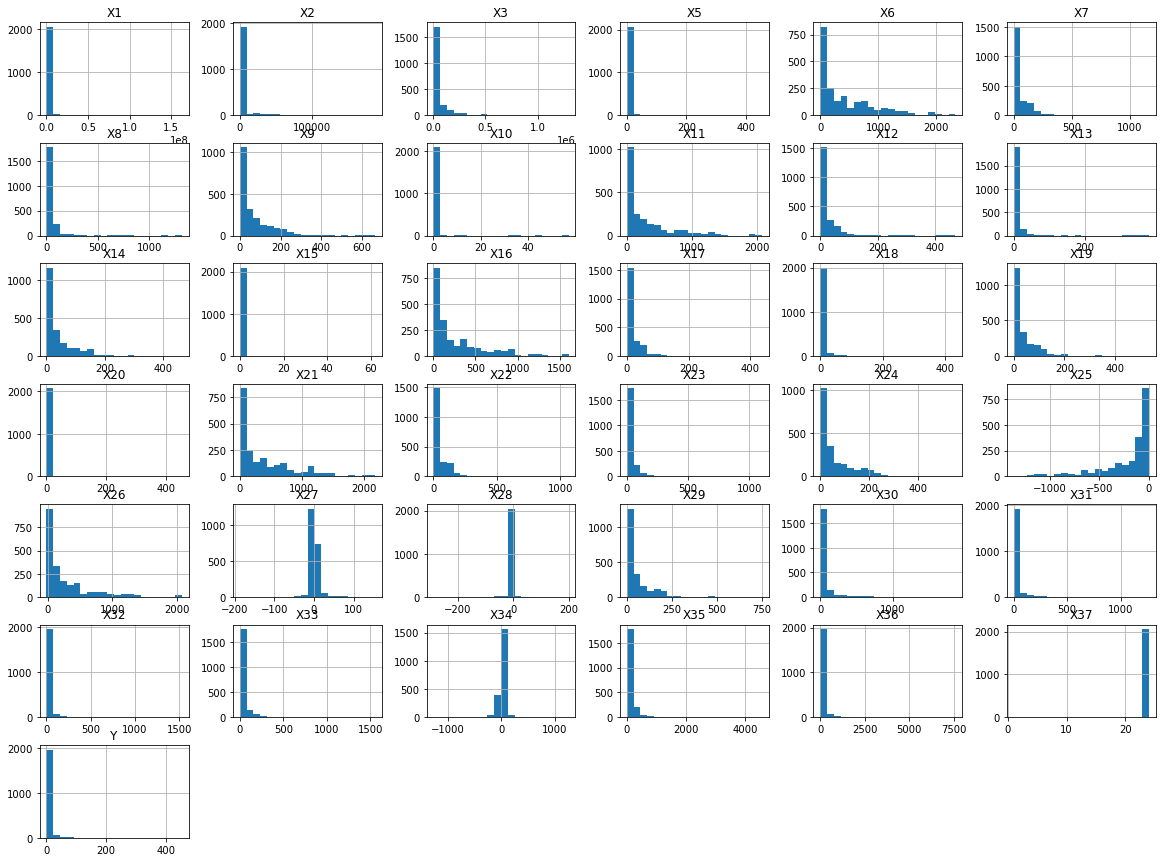

In [6]:
## Visualisation des variables quantitatives

df.hist(bins=20,figsize=(20,15))

plt.show()

On remarque les variables sont dissymétriques, et pour la pluspart plafonnée à zéro ce qui est le cas pour notre
variable cible, ce qui peut être problématique pour certains algorithme d'apprentissage qui pourrons en déduire que la variable Y ne va jamais au delà de 0.
Les histogrammes pour la plupart s'étendent bien plus loin à droite de la médiane qu'à gauche, ce qui fait que certains algorithmes d'apprentissage pourront avoir du mal à détecter des structurations. Nous essayerons de transformer cest variables afin d'obtenir une distribution plus proche d'une courbe en cloche. 

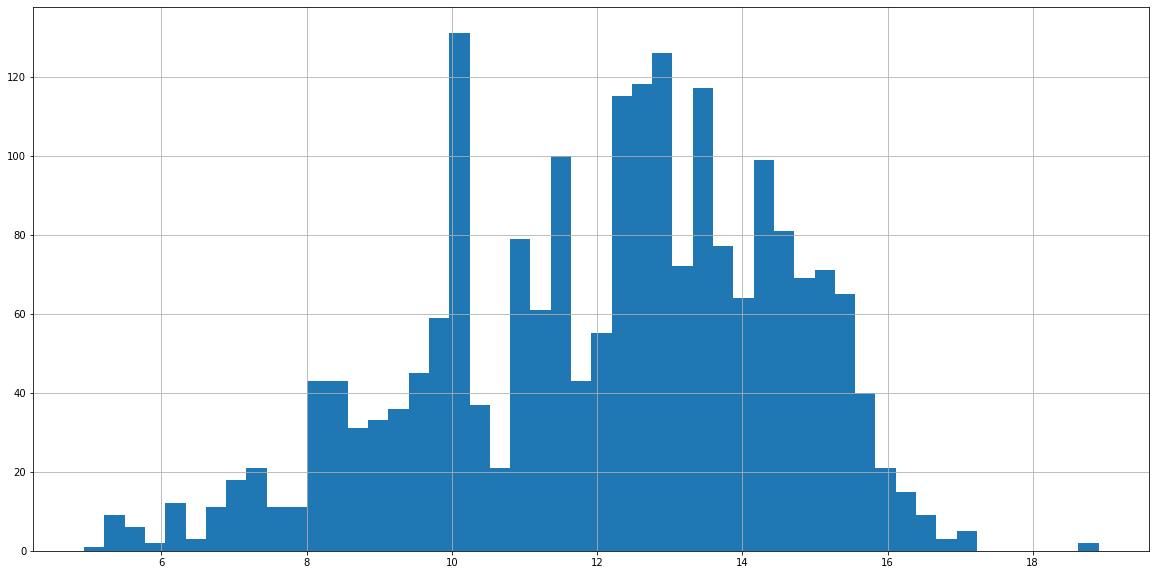

In [7]:
## Transformation de la variable X1, pour qu'elle puisse suivre une distribution normale

plt.rcParams["figure.figsize"]=[20,10]

(np.log(df["X1"])).hist(bins=50)

plt.show()

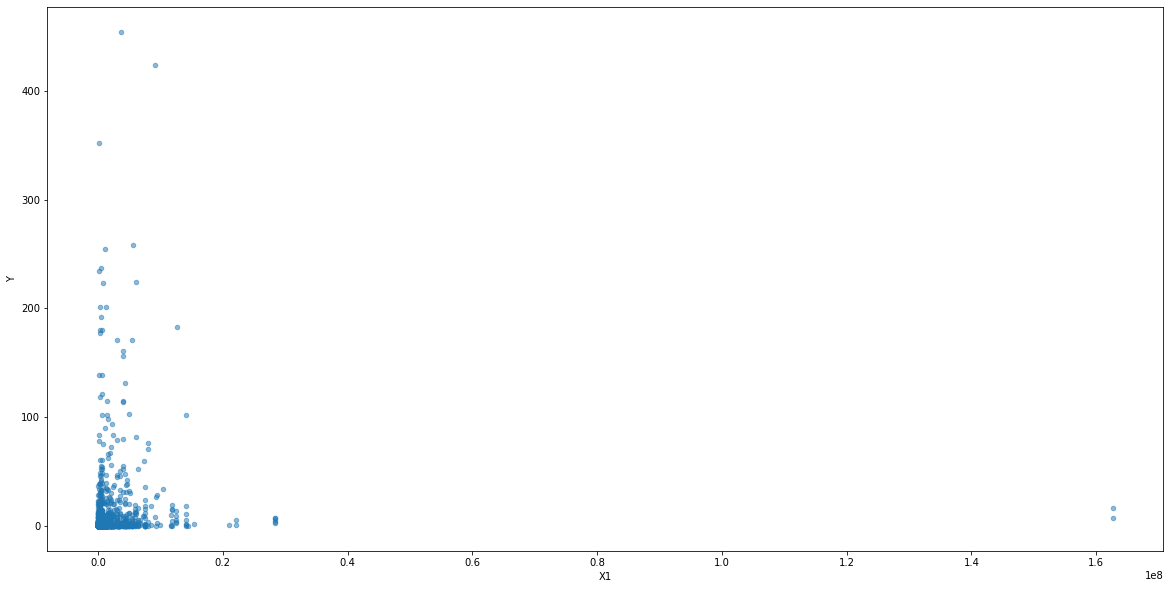

In [8]:
## regard de la variable X1 par rapport à Y

plt.rcParams["figure.figsize"]=[20,10]

df.plot(kind="scatter",x="X1",y='Y',alpha=0.5)

plt.show()

On constate là des points atypiques

In [9]:
## médiane de chacune des variables

df.median()

X1     269481.000000
X2          0.000000
X3       5954.000000
X5          0.000000
X6        214.000000
X7         22.729730
X8         11.000000
X9         30.640356
X10         0.000000
X11       111.000000
X12         7.866667
X13         2.000000
X14        17.061835
X15         0.000000
X16       111.000000
X17         8.363636
X18         1.000000
X19        18.162004
X20         0.000000
X21       203.000000
X22        20.680000
X23        10.000000
X24        28.524242
X25       -88.000000
X26       102.000000
X27         0.200000
X28         0.000000
X29        24.519490
X30        10.000000
X31         2.000000
X32         0.000000
X33        10.000000
X34         0.000000
X35        96.000000
X36        13.000000
X37        24.000000
Y           0.000000
dtype: float64

In [10]:
## Variable correlé avec la variable cible

df.corr()["Y"]

X1     0.069966
X2     0.041859
X3     0.225334
X5     0.185688
X6     0.280632
X7     0.358483
X8     0.333293
X9     0.341915
X10    0.150194
X11    0.242977
X12    0.353986
X13    0.342666
X14    0.318617
X15    0.017893
X16    0.260953
X17    0.361100
X18    0.233711
X19    0.350124
X20    0.189834
X21    0.275259
X22    0.357594
X23    0.339205
X24    0.335817
X25   -0.248992
X26    0.240367
X27    0.093098
X28   -0.065862
X29    0.348738
X30    0.401025
X31    0.654108
X32    0.117774
X33    0.417979
X34    0.448705
X35   -0.033155
X36    0.241647
X37    0.000601
Y      1.000000
Name: Y, dtype: float64

X31 bien correlé avec la variable cible Y, les autres sont moins linéairement correlé.
On va regarder quelques variables pas très correlé avec Y, s'il y a une dependence  non lineaire

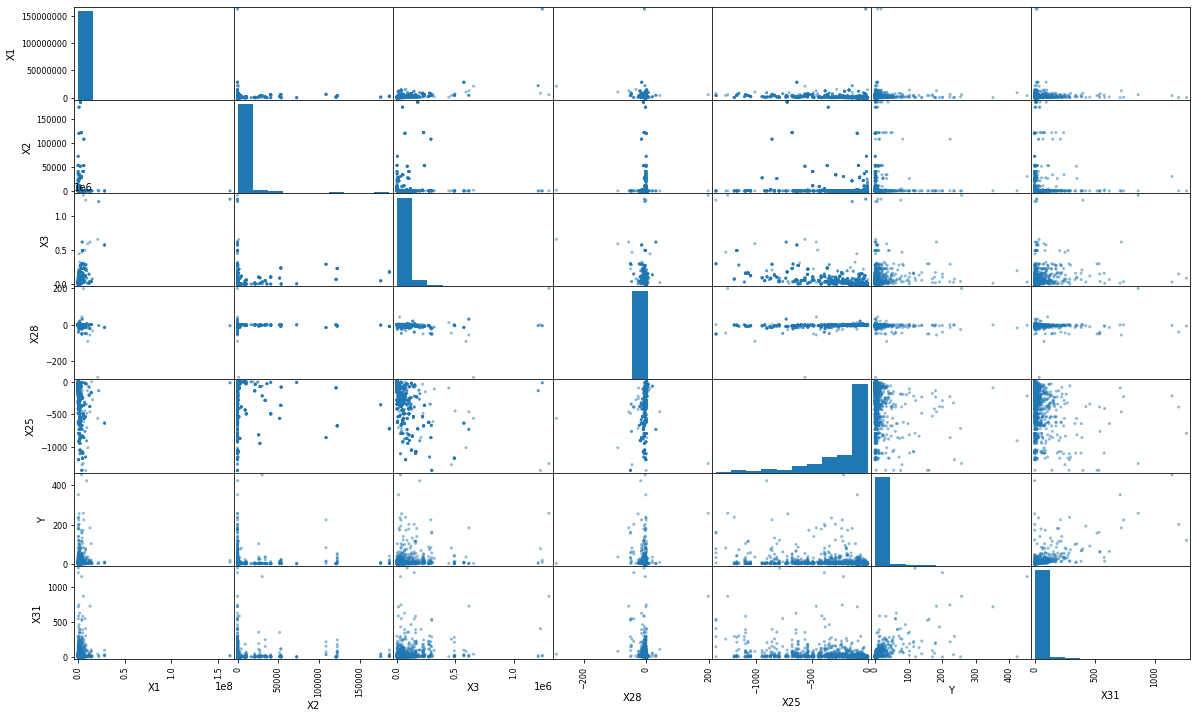

In [11]:
## selection de quelques variables

var=["X1","X2","X3","X4","X28","X25","Y","X31"]

scatter_matrix(df[var],figsize=(20,12))

plt.show()

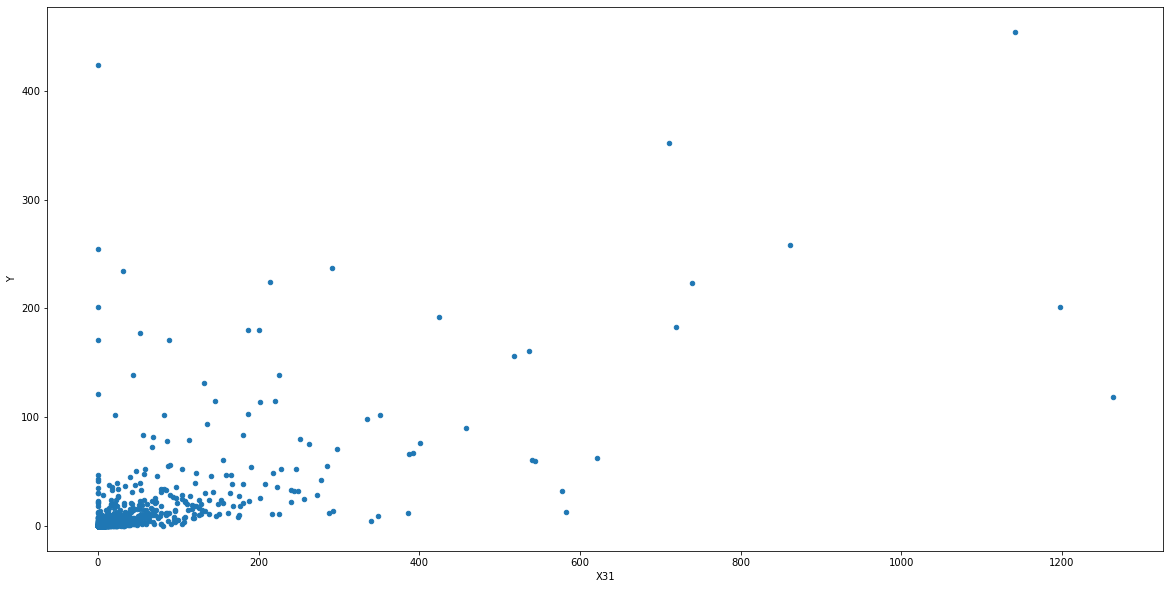

In [12]:
## La variable la plus prometteuse pour prédire Y est X31, 
## Représentation nuage de X31 en fonction de Y

plt.rcParams["figure.figsize"]=[20,10]

df.plot(kind="scatter",x="X31",y="Y",alpha=1)

plt.show()


## On n'obeserve pas de plafonnement apparent de la variable Y par rapport à X31, ce qui est plutôt bien.

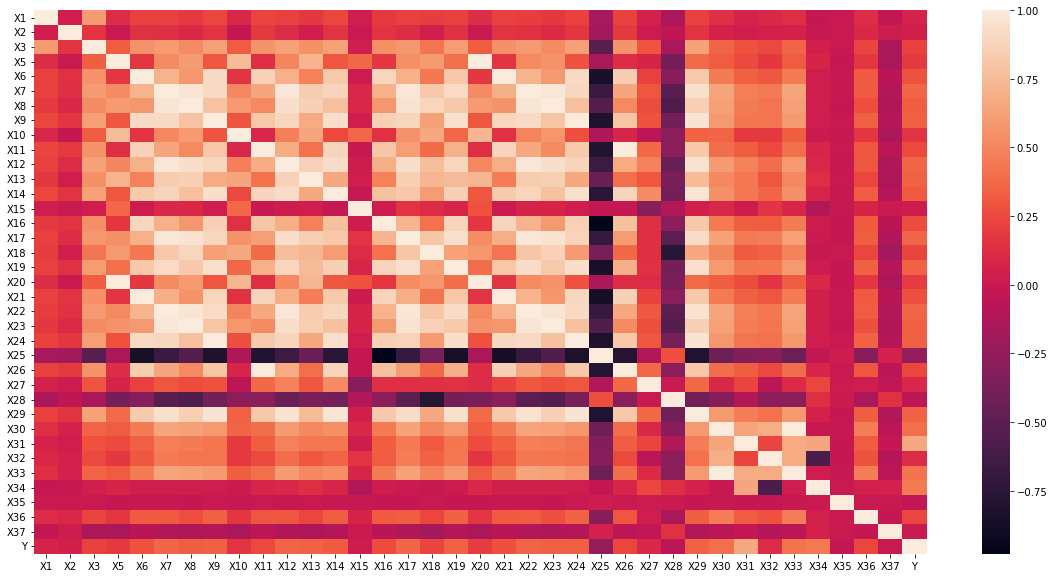

In [13]:
## definir le cadre des corrélations entre les variables quantitatives

plt.rcParams["figure.figsize"]=[20,10]

sns.heatmap(df.corr())

plt.show()

On observe pas grand chose ainsi mais si l'on regarde la colonne X17, il on observera qu'elle est fortement correlée à plusieurs autres variables.

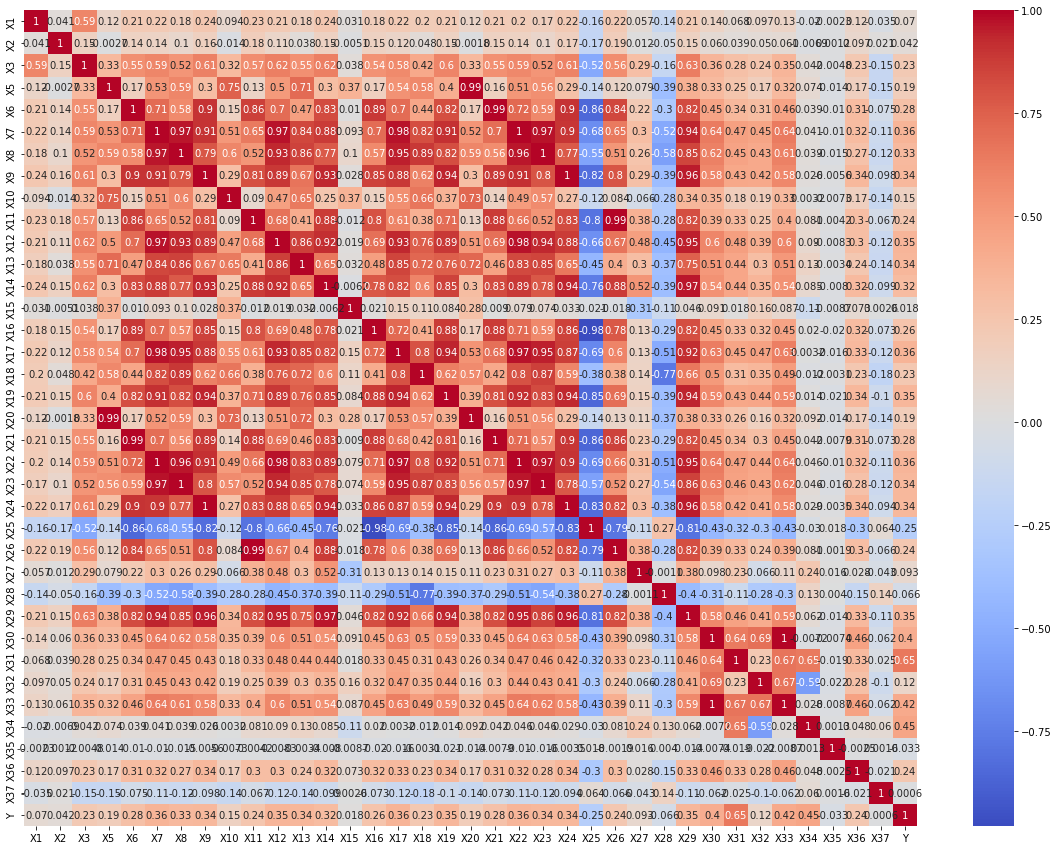

In [14]:

fig3 = plt.subplots(figsize=(20, 15))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.show()

In [15]:
## liste des variables correlées à plus 70% avec la colonne X17

df.corr()[df.corr()["X17"]>0.7]["X17"]

X7     0.975784
X8     0.946638
X9     0.884250
X12    0.933144
X13    0.849634
X14    0.819303
X16    0.719250
X17    1.000000
X18    0.804663
X19    0.938419
X22    0.972898
X23    0.947123
X24    0.872686
X29    0.916299
Name: X17, dtype: float64

Pour pouvoir voir toutes les variables correlées entre elles, nous ferons un clustering afin de former des groupes de variables correlées à un certains seuil. 

In [16]:
## Transormation des colonnne qualitatives en quantitatives

df1=pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(df[["X38"]]).toarray())

df["X4"]=LabelEncoder().fit_transform(df[["X4"]])

df=df.join(df1)

df=df.drop("X38",axis=1)

In [17]:
## Transormation des colonnne qualitatives en quantitatives

df2=pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(df_train[["X38"]]).toarray())

df_train["X4"]=LabelEncoder().fit_transform(df_train[["X4"]])

df_train=df_train.join(df2)

df_train=df_train.drop("X38",axis=1)

In [18]:
## Corrélation entre les variables

corr=df.drop('Y',axis=1).corr()

In [19]:
## On définit la distance entre deux variables 

dist = squareform(1-abs(corr))

In [20]:
## création de la matrice de similarité pour la classification hierachique ascendante

corr_linkage = hierarchy.complete(dist)

In [21]:
## définition des labels des variables

var=df.drop('Y',axis=1).columns

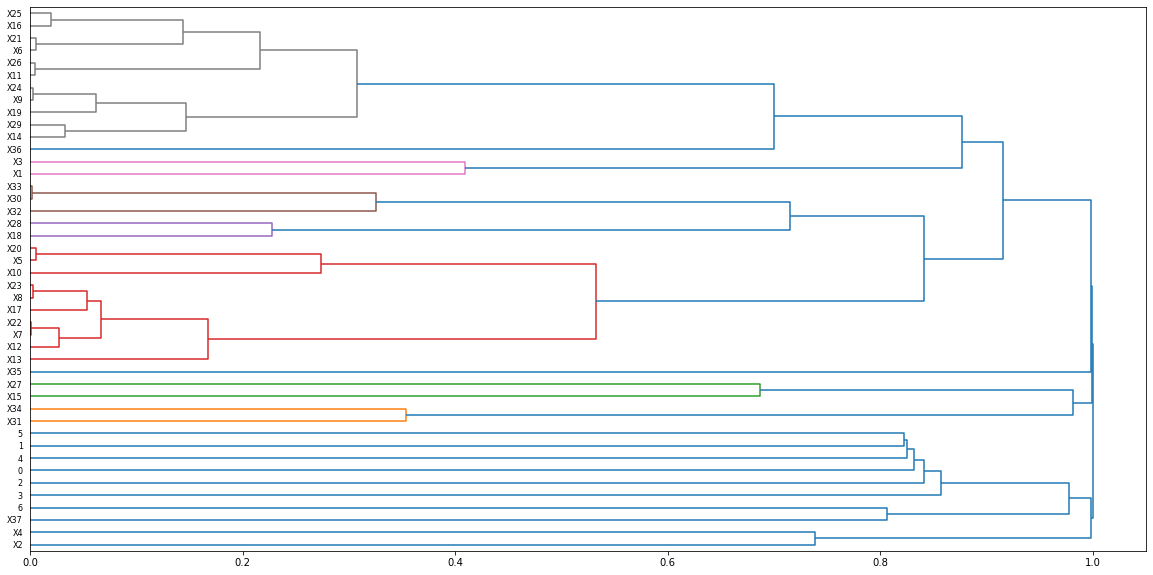

In [22]:
## représentation du dendogramme

dendro = hierarchy.dendrogram(
    corr_linkage,
    orientation="right",
    labels=var
)

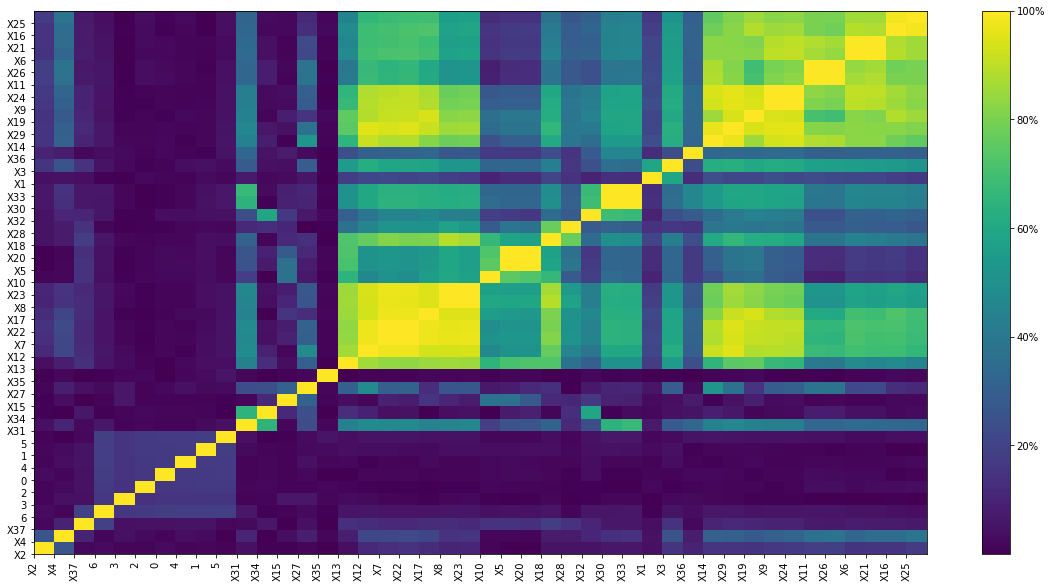

In [23]:
corr1=corr.to_numpy()

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

plot = ax.pcolor(abs(corr1[dendro["leaves"],:][:,dendro["leaves"]]))

dendro_idx = np.arange(0, len(dendro["ivl"]))

ax.set_xticks(dendro_idx)

ax.set_yticks(dendro_idx)

ax.set_xticklabels(dendro["ivl"], rotation='vertical')

ax.set_yticklabels(dendro["ivl"])

cbar = fig.colorbar(plot, format=ticker.PercentFormatter(xmax=1))

On observe mieux les groupes de variables les plus correlées entre elles

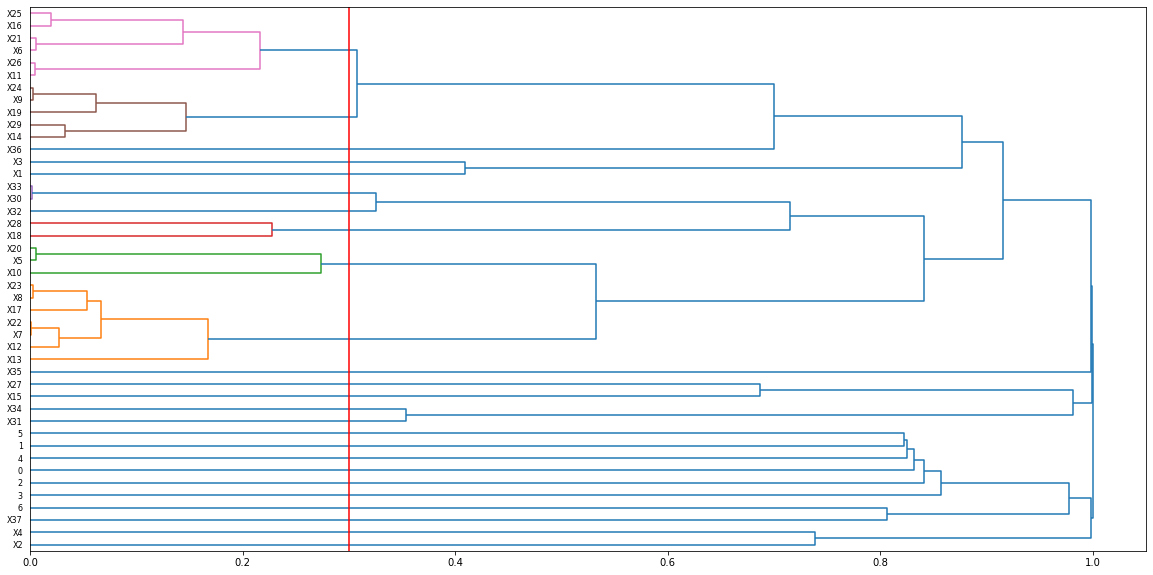

In [24]:
## formation des groupe avec un seuil de corrélation de 70%

hierarchy.dendrogram(
    corr_linkage,
    orientation="right",
    labels=var,
    color_threshold=0.3
)

plt.axvline(0.3, c='r')

plt.show()

In [25]:
# Définition du seuil de corrélation

threshold_for_cluster_creation = 0.3

# Récupération des clusters à partir de la hiérarchie

cluster_ids = hierarchy.fcluster(corr_linkage, threshold_for_cluster_creation, criterion='distance')

cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    
    cluster_id_to_feature_ids[cluster_id].append(idx)
    
clusters = [ list(v) for v in cluster_id_to_feature_ids.values() if len(v) >1]

clusters_col = [list(var[i] for i in v) for v in clusters]

# On ne conserve que la première variable de chaque cluster, les autres sont retirées

dropped_features = [ list(var[i] for i in v[1:]) for v in clusters ]

dropped_features = [item for sublist in dropped_features for item in sublist]

In [238]:
## comme représentant de chaque groupe, on prendra la moyenne(centre) des variables correlées 

"""
df_test=df.copy()

for i in range(len((clusters_col))):

    df_test["Clust_"+str(i)]=df_test[clusters_col[i]].sum(axis=1)/len(clusters_col[i])

liste_var=[elv for elem in clusters_col for elv in elem]

df_test=df_test.drop(liste_var, axis=1)
"""

In [590]:
## comme représentant de chaque groupe, on prendra la moyenne(centre) des variables correlées pour le train 

""""
for i in range(len((clusters_col))):

    df_train["Clust_"+str(i)]=df_train[clusters_col[i]].sum(axis=1)/len(clusters_col[i])

liste_var=[elv for elem in clusters_col for elv in elem]

df_train=df_train.drop(liste_var, axis=1)

"""

In [26]:
## On peut aussi récupérer un représentant de chaque groupe de variables correlées (la première variable par exemple)

df_test=df.drop(dropped_features,axis=1).copy()

df_train.drop(dropped_features, axis=1, inplace=True)

In [27]:
## Trnsformation de la variable X1  en log

df_test["X1"]=np.log(df_test["X1"])

X_train=df_test.drop(["Y"], axis=1).copy()

Y_train=df_test["Y"].copy()

In [28]:
## Trnsformation de la variable X1, pour les données test

df_train["X1"]=np.log(df_train["X1"])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=0)

print("taille du jeu d\'entrainement",x_train.shape,"\n")

print("taille du jeu de test",x_test.shape,"\n")

taille du jeu d'entrainement (1672, 25) 

taille du jeu de test (419, 25) 



In [30]:
## Normalisation

scale=StandardScaler()

scale.fit(x_train)

x_train_scale=scale.transform(x_train)

x_test_scale=scale.transform(x_test)

# Début d'écriture des modèles

## regression lineaire multiple

In [31]:
model1=LinearRegression()

model1.fit(x_train,y_train)

predict_reg = mean_absolute_error(model1.predict(x_test),y_test)

predict_reg

5.211533167814678

### Lasso

In [32]:
lasso = LassoCV(random_state=0,n_alphas=100,max_iter=1000,tol=1e-6,positive=False)

lasso.fit(x_train, y_train)

predict_lasso = mean_absolute_error(lasso.predict(x_test),y_test)

print(f"nombre de variables sélectionnées par lasso: {np.sum(lasso.coef_!=0)}")

print("le mae est",predict_lasso)

nombre de variables sélectionnées par lasso: 6
le mae est 5.3331881518871835


In [33]:
print(lasso.alpha_)

699.2453393480575


In [34]:
x=pd.DataFrame(x_train,columns=X_train.columns)

df_corr=x.loc[:,lasso.coef_!=0]

df_corr["y"]=y_train

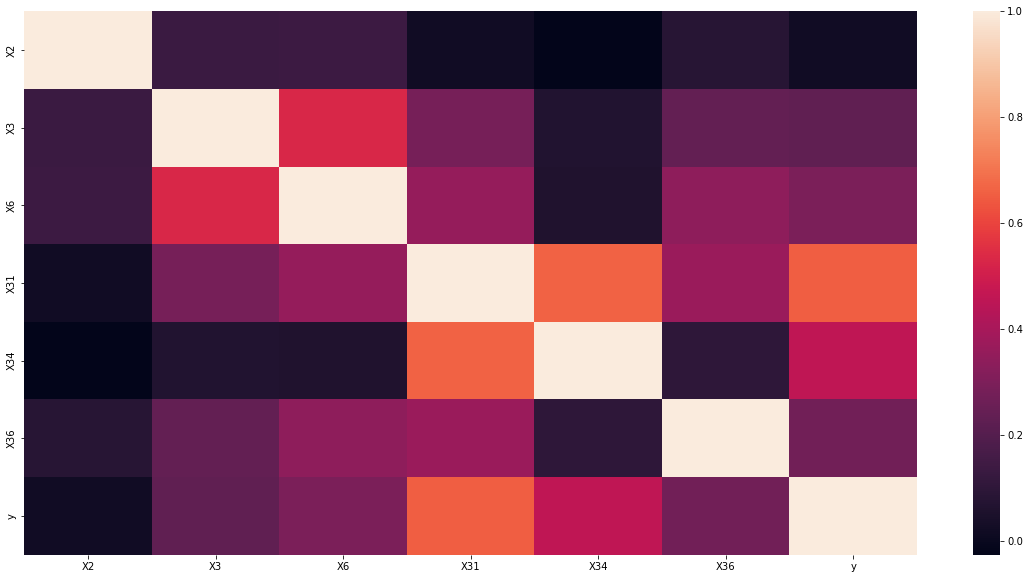

In [35]:
## definir le cadre

plt.rcParams["figure.figsize"]=[20,10]

sns.heatmap(df_corr.corr())

plt.show()

In [36]:
#np.isinf(df_corr.iloc[:,:10]).sum()

In [37]:
## essayons de tester le model uniquement sur ces variabes sélectionnées par le lasso

model_lasso = LinearRegression()

model_lasso.fit(df_corr.iloc[:,:6],df_corr["y"])

predict_lsols = mean_absolute_error(model_lasso.predict(x_test.loc[:,lasso.coef_!=0]),y_test)

predict_lsols

4.245688340264849

In [38]:
print("Errors :\n"),

for method, error in zip(["ols           ", "Lasso", "Ols sur variable de Lasso "],
                         [predict_reg, predict_lasso, predict_lsols]):
    print(method + " : %.2f" % error)

Errors :

ols            : 5.21
Lasso : 5.33
Ols sur variable de Lasso  : 4.25


## regression de Ridge

In [39]:
ridge = RidgeCV(alphas =  [100,200, 500,550,600,1e3,1050,1e4,1e5], cv = 5,gcv_mode='auto' )

ridge.fit(x_train,y_train)

predict_ridge = mean_absolute_error(ridge.predict(x_test),y_test)

print("alpha ridge",ridge.alpha_)

print("Le mae est",predict_ridge)

alpha ridge 100000.0
Le mae est 4.70441652352868


In [40]:
print("Errors :\n"),

for method, error in zip(["ols           ", "Lasso        ", "Ols sur variable Lasso ", "Ridge         "],
                         [predict_reg, predict_lasso, predict_lsols, predict_ridge]):
    print(method + " : %.2f" % error)

Errors :

ols            : 5.21
Lasso         : 5.33
Ols sur variable Lasso  : 4.25
Ridge          : 4.70


## Elastic Net

In [46]:
model_elas=ElasticNetCV(l1_ratio=1,cv=5,random_state=0,eps=1e-6,n_alphas=200,tol=1e-8,selection='random')

model_elas.fit(x_train,y_train)

mean_absolute_error(model_elas.predict(x_test),y_test)

4.376404906552259

## KNN

In [48]:
params=[{'n_neighbors':[20,25,90,80,100,110]}]

model_knn=make_pipeline(StandardScaler(),GridSearchCV(KNeighborsRegressor(),params,cv=5,
        verbose=0 
    ,scoring='neg_mean_squared_error'))

model_knn.fit(x_train,y_train)

print(model_knn[1].best_params_)

{'n_neighbors': 20}


In [57]:
model_kkn_reg=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=30,leaf_size=20,weights='distance'
            ,p=1,algorithm='ball_tree')).fit(x_train,y_train)

error_knn=mean_absolute_error(model_kkn_reg.predict(x_test),y_test)

error_knn

3.8340174199477115

## LarsCV

In [59]:
model_larscv=LarsCV(cv=5,n_jobs=1).fit(x_train,y_train)

error_larscv=mean_absolute_error(model_larscv.predict(x_test),y_test)

error_larscv

4.3755605832412625

## regression de Huber

In [60]:
param_grid = [
  {'epsilon':[1,1.7,2,3,4,5,6],
  'alpha': [1e-6,1e-5,1e-4,1e-3,1e-2],
  'max_iter':[100,150,200,250]},
 ]

optimal_params = GridSearchCV(
        HuberRegressor(), 
        param_grid,
        cv=5, # cross-validation
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    ,scoring='neg_mean_squared_error'
    )

optimal_params.fit(x_train, y_train)

print(optimal_params.best_params_)

{'alpha': 1e-05, 'epsilon': 4, 'max_iter': 200}


In [80]:
huber_reg=HuberRegressor(alpha=1e-4,epsilon=2,max_iter=500,tol=1e-4)

huber_reg.fit(x_train,y_train)

predict_huber=mean_absolute_error(huber_reg.predict(x_test),y_test)

predict_huber

2.687684642657366

In [81]:
print("Errors :\n"),

for method, error in zip(["ols           ", "Lasso        ", "Ols sur variable Lasso ", "Ridge         ","Huber Regression"],
                         [predict_reg, predict_lasso, predict_lsols, predict_ridge,predict_huber]):
    print(method + " : %.2f" % error)

Errors :

ols            : 5.21
Lasso         : 5.33
Ols sur variable Lasso  : 4.25
Ridge          : 4.70
Huber Regression : 2.69


In [82]:
#max(abs(huber_reg.predict(x_test)-y_test))

## Support vector regression

In [83]:
param_grid = [
  {'C': [150,200,250,280,300], 
   'gamma': [0.0001, 0.001,0.0050], 
   'kernel': ['rbf','sigmoid'],
  'epsilon':[0.4,0.5,0.6,0.7]},
 ]

optimal_params =make_pipeline(StandardScaler(), GridSearchCV(
        SVR(), 
        param_grid,
        cv=5, # cross-validation
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    ,scoring='neg_mean_squared_error'
    ) )

optimal_params.fit(x_train, y_train)

print(optimal_params[1].best_params_)

{'C': 300, 'epsilon': 0.7, 'gamma': 0.001, 'kernel': 'rbf'}


In [103]:
svr_model = make_pipeline(StandardScaler(),SVR(C=60, gamma=0.001, epsilon=1e-4,kernel='rbf'))

svr_model.fit(x_train, y_train)

predict_svr = mean_absolute_error(svr_model.predict(x_test),y_test)

predict_svr

2.706752805379682

In [104]:
print("Errors :\n"),

for method, error in zip(["ols           ", "Lasso        ", "Ols sur variable Lasso ", "Ridge         ","Huber Regression", "SVR     "],
                         [predict_reg, predict_lasso, predict_lsols, predict_ridge,predict_huber,predict_svr]):
    print(method + " : %.2f" % error)

Errors :

ols            : 5.21
Lasso         : 5.33
Ols sur variable Lasso  : 4.25
Ridge          : 4.70
Huber Regression : 2.69
SVR      : 2.71


## Linear SVR

In [105]:
param_grid = [
  {'tol': [1e-6,1e-5,1e-4,1e-6,1e-3], 
   'C': [0.9,1,1.2,1.3,1.4,1.5], 
  'epsilon':[1e-3,1e-2,0.1,0.2]},
 ]

opt_lin_SVR =make_pipeline(StandardScaler(), GridSearchCV(
        LinearSVR(random_state=0,loss='epsilon_insensitive'), 
        param_grid,
        cv=5, # cross-validation
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    ,scoring='neg_mean_squared_error'
    ) )

opt_lin_SVR.fit(x_train, y_train)

print(opt_lin_SVR[1].best_params_)

{'C': 1.4, 'epsilon': 0.01, 'tol': 1e-06}


In [120]:
LinReg_SVR = make_pipeline(StandardScaler(),
                     LinearSVR(C=1,epsilon=1e-2,random_state=0, tol=1e-6, max_iter=500))

LinReg_SVR.fit(x_train,y_train)

LinReg_SVR_predict= mean_absolute_error(LinReg_SVR.predict(x_test),y_test)

LinReg_SVR_predict

2.7481648729648307

## Random Forest Regressor

In [121]:
RF = RandomForestRegressor()

parametre = {'n_estimators' : [ 100, 200,250],
            'max_features' : [10,5,6,3,9,7],
            'random_state':[0,5,8,9,10]}

optimal_params =GridSearchCV(
        RF, 
        parametre,
        cv=5,
        verbose=0
    ,scoring='neg_mean_squared_error'
    )

optimal_params.fit(x_train,y_train)

print(optimal_params.best_params_)

{'max_features': 10, 'n_estimators': 100, 'random_state': 9}


In [334]:
RF_model=RandomForestRegressor(n_estimators=238,criterion='absolute_error',max_features=24,random_state=10,min_samples_leaf=15,
                           max_depth=10,min_impurity_decrease=1e-4,bootstrap=True)

RF_model.fit(x_train,y_train)

predict_RF=mean_absolute_error(RF_model.predict(x_test),y_test)

predict_RF

2.427373097210244

## Bagging et Boosting

## Bagging avec les arbres de regression

In [141]:
arbre = DecisionTreeRegressor(random_state=15,min_samples_leaf=200)

arbre.fit(x_train,y_train)

predict_arbre = mean_absolute_error(arbre.predict(x_test), y_test)

print("MAE pour un seul arbre","%.3f" %  predict_arbre)

MAE pour un seul arbre 5.104


In [143]:
arbre = DecisionTreeRegressor(random_state=0,min_samples_leaf=50)

bagging = BaggingRegressor(arbre,random_state=15,bootstrap_features=True)

parametre = {'n_estimators' : [600,650,700,750]}
    
optBagging = GridSearchCV(bagging, parametre)

optBagging.fit(x_train, y_train)

predict_bag_arb=mean_absolute_error(optBagging.predict(x_test), y_test)

print("Erreur du bagging avec les arbres:","%.3f" %  predict_bag_arb)

Erreur du bagging avec les arbres: 4.626


In [146]:
## arbre

arbre1=BaggingRegressor(arbre,n_estimators=650,random_state=0,bootstrap_features=True,
                        warm_start=True).fit(x_train,y_train)

arbre1_error= mean_absolute_error(arbre1.predict(x_test), y_test)

arbre1_error

4.604030058793947

## Bagging avec les SVR

In [147]:
#svr = SVR(C=1e-5, gamma=0.01, epsilon=1e-3,kernel='sigmoid')

svr=SVR(C=60, gamma=0.001, epsilon=1e-4,kernel='rbf')

bagging_svr = BaggingRegressor(svr,random_state=0)

parametre = {'n_estimators' : [20,30,50]}
    
optBagging_svr = make_pipeline(StandardScaler(),GridSearchCV(bagging_svr, parametre))

optBagging_svr.fit(x_train, y_train)

predict_bag_svr=mean_absolute_error(optBagging_svr.predict(x_test), y_test)

print("Erreur du bagging avec les SVR:","%.3f" %  predict_bag_svr)

Erreur du bagging avec les SVR: 2.740


In [160]:
## bagging
svr = SVR(C=60, gamma=0.001, epsilon=1e-4,kernel='rbf')

bagging_svr1=make_pipeline(StandardScaler(),BaggingRegressor(svr, n_estimators=30,random_state=9,bootstrap_features=True,
                        warm_start=True)).fit(x_train, y_train)

mean_absolute_error(bagging_svr1.predict(x_test), y_test)

2.8258803791990874

## Bagging avec la regression de Huber

In [161]:
huber = HuberRegressor()

bagging_huber = BaggingRegressor(huber, random_state=1)

parametre = {'n_estimators' : [50, 100,150,200,250,300]}
    
optBagging_huber = GridSearchCV(bagging_huber, parametre,scoring='neg_mean_absolute_error')

optBagging_huber.fit(x_train, y_train)

predict_bag_huber=mean_absolute_error(optBagging_huber.predict(x_test), y_test)

print("Erreur du bagging avec la regression de Huber:","%.3f" %  predict_bag_huber)

Erreur du bagging avec la regression de Huber: 3.067


In [172]:
huber = HuberRegressor()

huber1=BaggingRegressor(huber,n_estimators=250, random_state=10, bootstrap_features=True,
                        warm_start=True).fit(x_train, y_train)

huber1_error=mean_absolute_error(huber1.predict(x_test), y_test)

huber1_error

2.8214896505470692

## Boosting avec RF

In [320]:
test=RandomForestRegressor(n_estimators=238,criterion='absolute_error',max_features=24,random_state=10,min_samples_leaf=15,
                           max_depth=10,min_impurity_decrease=1e-4,bootstrap=True).fit(x_train,y_train)

y_train_2=y_train-test.predict(x_train)

test2=RandomForestRegressor(n_estimators=238,criterion='absolute_error',max_features=24,random_state=10,min_samples_leaf=15,
                           max_depth=10,min_impurity_decrease=1e-4,bootstrap=True).fit(x_train,y_train_2)

y_train_3=y_train_2-test2.predict(x_train)

test3=RandomForestRegressor(n_estimators=238,criterion='absolute_error',max_features=24,random_state=10,min_samples_leaf=15,
                           max_depth=10,min_impurity_decrease=1e-4,bootstrap=True).fit(x_train,y_train_3)


y_train_4=y_train_3-test3.predict(x_train)

test4=RandomForestRegressor(n_estimators=238,criterion='absolute_error',max_features=24,random_state=10,min_samples_leaf=15,
                           max_depth=10,min_impurity_decrease=1e-4,bootstrap=True).fit(x_train,y_train_4)




y_pred=sum(model.predict(x_test) for model in [test, test2, test3, test4])


In [332]:
mean_absolute_error(y_test,y_pred)

2.461098049288142

## XGBOOST

In [173]:
parametre = {'n_estimators' : [10,20,30,40,50],
            'max_depth':[6,7,8,9,10],
            'eta':[0.1,0.2,0.3,0.4],
            'subsample':[0.7,0.8,0.9],
            'colsample_bytree':[0.5,0.6,0.7]}
    
model_boost = GridSearchCV(XGBRegressor(), parametre)

model_boost.fit(x_train, y_train)

predict_boost=mean_absolute_error(model_boost.predict(x_test), y_test)

print("Erreur du bagging avec les SVR:","%.3f" %  predict_boost)

Erreur du bagging avec les SVR: 3.892


In [178]:
model_boost1=XGBRegressor(n_estimators=100,max_depth=20,eta=0.01,subsample=0.2,colsample_bytree=0.8).fit(x_train, y_train)

predict_boost1=mean_absolute_error(model_boost1.predict(x_test), y_test)

predict_boost1

2.8144617680646924

## Gradient Boosting

In [179]:
param={'learning_rate':[0.1,0.2,0.3,0.5],
      'n_estimators':[100,150,250,300],
      'subsample':[0.4,0.6,0.8,1],
      'max_features':['auto', 'sqrt', 'log2']}

model_gb=GridSearchCV(GradientBoostingRegressor(random_state=8),param)

model_gb.fit(x_train, y_train)

error_gb=mean_absolute_error(model_gb.predict(x_test),y_test)

error_gb

4.957078409668627

In [180]:
gradient=GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=120,random_state=8)

gradient.fit(x_train, y_train)

error=[mean_absolute_error(y_test,y_pred) for y_pred in gradient.staged_predict(x_test)]

best_est=np.argmin(error)+1

gradient=GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=best_est).fit(x_train, y_train)

mean_absolute_error(gradient.predict(x_test),y_test)

4.175956893854904

In [184]:
model_gb1=GradientBoostingRegressor(learning_rate=0.1,max_features='sqrt',n_estimators=30,
                                subsample=1,random_state=0,max_depth=4,min_samples_split=7,
                                   max_leaf_nodes=15).fit(x_train, y_train)
error_gb1=mean_absolute_error(model_gb1.predict(x_test),y_test)

error_gb1

4.289236315613588

## Stacking

In [195]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [194]:
estimators = [
    ('Linear_SVR', LinReg_SVR),
    ('KNN',model_knn),
    ('rf', RF_model),
    ('XGboost', model_boost1),
    ('svr',svr_model),
   ('Huber',huber_reg)]

Reg_stack_bag = StackingRegressor(estimators=estimators, final_estimator=HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=64),
                              cv=10)
      
Reg_stack_bag.fit(x_train,y_train)

Reg_stack_bag_predict=mean_absolute_error(Reg_stack_bag.predict(x_test), y_test)

Reg_stack_bag_predict

4.387538131711198

### Regression de Huber comme estimateur final

In [342]:
estimators = [
    ('Huber',huber1),
    
   ('rf', RF_model),
    
    ('ortho',OrthogonalMatchingPursuitCV(cv=10)),
 
    ('KNN',model_knn),
]

Reg_stack = StackingRegressor(estimators=estimators, final_estimator=HuberRegressor(),
                              cv=3)
      
Reg_stack.fit(x_train,y_train)

Reg_stack_predict=mean_absolute_error(Reg_stack.predict(x_test), y_test)

Reg_stack_predict

2.6566444112340744

### Linear SVR comme estimateur final

In [343]:
estimators = [
    ('rf', RF_model),
   ('Huber',huber1),
    ('KNN',model_knn),
    ('Lasso',lasso),
]

Reg_stack_bag = StackingRegressor(estimators=estimators, final_estimator=LinReg_SVR,
                              cv=3)
      
Reg_stack_bag.fit(x_train,y_train)

Reg_stack_bag_predict=mean_absolute_error(Reg_stack_bag.predict(x_test), y_test)

Reg_stack_bag_predict

2.568620851346268

## Autre stacking

In [191]:
estimators = [
    ('rf', RF_model),
    ('Ortho', OrthogonalMatchingPursuitCV(cv=5)),
     ('XGboost', model_boost1),
    ('svr',svr_model),
   ('Huber',huber_reg),
    ('Linear_SVR', LinReg_SVR),
    ('KNN',model_knn),
    
   ('gb1',LinReg_SVR),
    ('Lasso',lasso),
]

Reg_stack_bag_ortho= StackingRegressor(estimators=estimators, final_estimator=LinReg_SVR,
                              cv=5)
      
Reg_stack_bag_ortho.fit(x_train,y_train)

Reg_stack_bag_ortho_predict=mean_absolute_error(Reg_stack_bag_ortho.predict(x_test), y_test)

Reg_stack_bag_ortho_predict

2.6408236108500494

In [197]:
estimators = [
    ('Lasso',lasso),
    ('Ortho', OrthogonalMatchingPursuitCV(cv=10)),
   ('Huber',huber_reg),
('XGboost', model_boost1),
    ('huber1', huber1)
]

Reg_stack_bag_ortho=StackingRegressor(estimators=estimators, final_estimator=LinReg_SVR,
                              cv=3)
      
Reg_stack_bag_ortho.fit(x_train,y_train)

Reg_stack_bag_ortho_predict=mean_absolute_error(Reg_stack_bag_ortho.predict(x_test), y_test)

Reg_stack_bag_ortho_predict

2.6128392333806043

In [336]:
## on utilisera l'algo de random forest pour la prédiction, car il a le meilleur MAE

y_predict=RF_model.predict(df_train)

y_predict

array([1.68067227e-02, 1.68067227e-02, 1.68067227e-02, ...,
       8.57268908e+01, 5.08340336e+01, 4.49264706e+01])

In [337]:
y_predict=pd.DataFrame(y_predict,columns=["Valeur_Predite"])

In [338]:
y_predict.to_csv("id2306.csv", index=False,header=False)

In [339]:
y_predict.value_counts()

Valeur_Predite
0.000000          14398
0.016807            809
0.004202            602
0.008403            569
0.033613            303
                  ...  
12.987395             1
12.991597             1
3.495798              1
13.002101             1
9.716387              1
Length: 6621, dtype: int64

In [340]:
RF_model.predict(x_test)-y_test

1170   -0.852941
1088   -3.739496
1211    0.000000
546    -0.647059
828    -1.310924
          ...   
1188    0.000000
359     0.000000
583    -0.476891
731     0.008403
1069    0.000000
Name: Y, Length: 419, dtype: float64